Image loaded successfully.
Converted to grayscale.
Image resized.
Edge detection completed.
Edge detection successful.
Processing edge point 0/19943
Processing edge point 1000/19943
Processing edge point 2000/19943
Processing edge point 3000/19943
Processing edge point 4000/19943
Processing edge point 5000/19943
Processing edge point 6000/19943
Processing edge point 7000/19943
Processing edge point 8000/19943
Processing edge point 9000/19943
Processing edge point 10000/19943
Processing edge point 11000/19943
Processing edge point 12000/19943
Processing edge point 13000/19943
Processing edge point 14000/19943
Processing edge point 15000/19943
Processing edge point 16000/19943
Processing edge point 17000/19943
Processing edge point 18000/19943
Processing edge point 19000/19943
Hough transform completed.


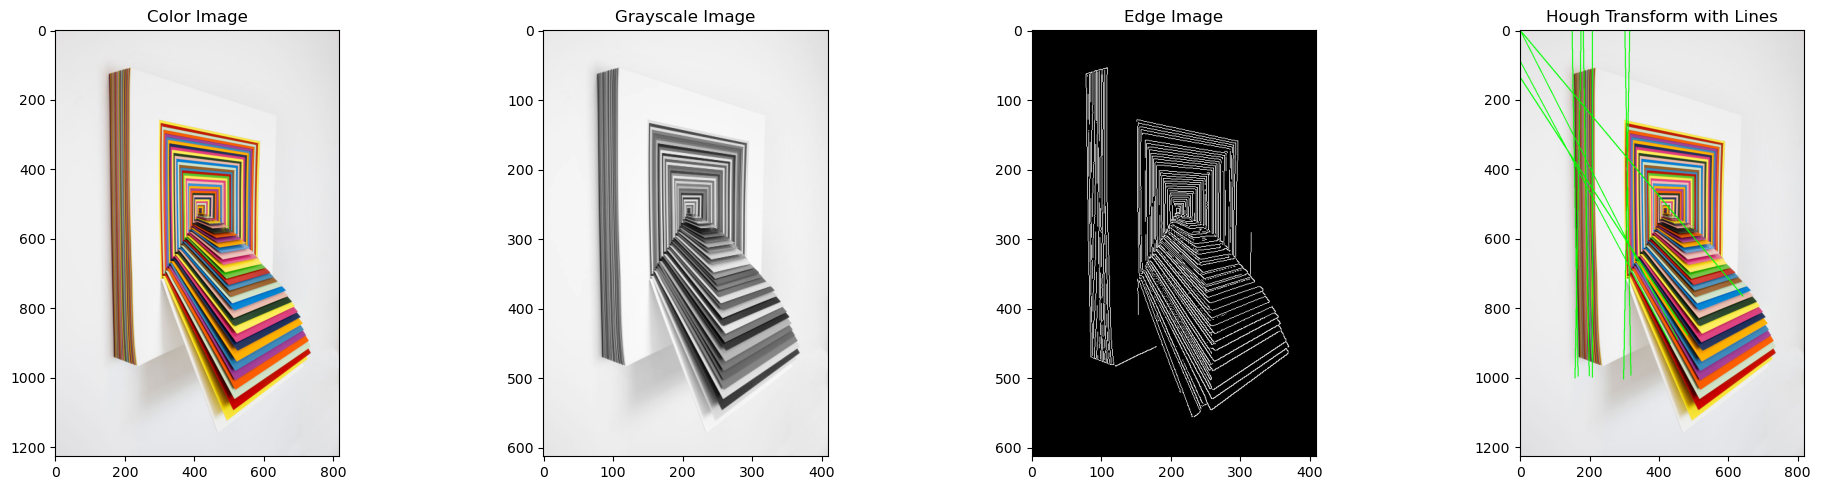

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def myHoughTransform(Im, rhoRes, thetaRes):
    """
    This function performs the Hough Transform on an edge-detected image to find lines.
    """
    # Get the image dimensions
    height, width = Im.shape
    
    # Calculate the maximum distance possible (diagonal of the image)
    diag_len = int(np.ceil(np.sqrt(height**2 + width**2)))
    
    # Create arrays of rho and theta values based on the resolution
    rhos = np.arange(-diag_len, diag_len + 1, rhoRes)
    thetas = np.arange(0, np.pi, thetaRes)
    
    # Initialize an accumulator array to zero for all rho and theta combinations
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=int)
    
    # Find all non-zero pixels which are edge points
    edge_points = np.argwhere(Im)
    
    # Process each edge point to populate the Hough space
   
  """
    1. 霍夫变换的目的是在边缘图像中检测直线。通过将图像空间中的边缘点映射到参数空间(ρ-θ空间),可以将共线的边缘点聚集在一起,形成参数空间中的峰值。

    2. 函数的输入包括边缘图像(Im)、距离分辨率(rhoRes)和角度分辨率(thetaRes)。根据输入的分辨率,生成参数空间中的ρ和θ刻度。

    3. 初始化一个累加器(accumulator),用于记录参数空间中每个(ρ,θ)点的投票数。找到边缘图像中所有非零像素的坐标,即边缘点的位置。

    4. 对于每个边缘点,遍历所有可能的θ值。对于每个θ,根据公式ρ=x*cos(θ)+y*sin(θ)计算对应的ρ值,并将累加器中对应的(ρ,θ)点的投票数加1。

    5. 完成所有边缘点的遍历后,累加器中投票数较高的(ρ,θ)点对应图像中的直线。最后返回累加器、ρ刻度和θ刻度,用于后续的直线提取和可视化。

    通过将边缘点映射到参数空间,并统计每个(ρ,θ)点的投票数,霍夫变换可以鲁棒地检测图像中的直线,即使存在噪声和不完整的边缘。
  
  """
    
  """
    # TYPE YOUR CODE HERE
 
    # TYPE YOUR CODE HERE
  
    # TYPE YOUR CODE HERE
 
  """


def non_maximum_suppression(accumulator, rhos, thetas, threshold, n_lines):

    """
    
    通过非极大值抑制(Non-Maximum Suppression)算法，从霍夫变换的累加器中提取最显著的直线。

    1. 非极大值抑制的目的是从霍夫变换的累加器中提取最显著的直线,同时抑制附近的非极大值点,以避免检测到重复或相似的直线。

    2. 函数的输入包括霍夫变换的累加器(accumulator)、ρ和θ刻度(rhos和thetas)、阈值(threshold)和要提取的直线数量(n_lines)。

    3. 创建累加器的副本(suppressed_accumulator),用于存储非极大值抑制后的结果。初始化一个空列表(lines)用于存储提取的直线。

    4. 迭代提取直线,直到提取到指定数量的直线或不再有超过阈值的点。在每次迭代中,找到suppressed_accumulator中的最大值点,其坐标为(rho_idx, theta_idx)。如果该点的值小于阈值,则提取完成。

    5. 对找到的最大值点周围的区域进行抑制,将suppressed_accumulator中对应区域的值设为0,以避免重复检测相似的直线。将找到的直线参数(rho, theta)添加到lines列表中。重复步骤4和5,直到提取完所有直线或达到指定数量。

    通过非极大值抑制,可以从霍夫变换的累加器中提取最显著的直线,同时抑制附近的非极大值点,避免检测到重复或相似的直线。这样可以获得图像中最重要的直线信息,提高直线检测的准确性和效率。


    """

   
  """
    # TYPE YOUR CODE HERE
 
    # TYPE YOUR CODE HERE
  
    # TYPE YOUR CODE HERE
 
  """ 
    
    

def draw_lines(image, lines, scale_factor):
    """
    Draw lines on the image using the Hough transform lines.

    Parameters:
    - image: Original image on which lines will be drawn
    - lines: List of tuples (rho, theta)
    - scale_factor: The factor by which the image was scaled down

    Returns:
    - image_with_lines: Image with lines drawn
    """
    image_with_lines = np.copy(image)
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho / scale_factor
        y0 = b * rho / scale_factor
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image_with_lines

# Load and preprocess the image
image_path = 'stark.jpg'
color_image = cv2.imread(image_path)
if color_image is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found or could not be read.")
else:
    print("Image loaded successfully.")

image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
print("Converted to grayscale.")

scale_factor = 0.5
image = cv2.resize(image, (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)))
print("Image resized.")

edges = cv2.Canny(image, 50, 150)
print("Edge detection completed.")
if edges is None:
    raise RuntimeError("Edge detection failed.")
else:
    print("Edge detection successful.")

rhoRes = 1
thetaRes = np.pi / 180
img_hough, rhoScale, thetaScale = myHoughTransform(edges, rhoRes, thetaRes)
print("Hough transform completed.")

threshold = 150
n_lines = 10
lines = non_maximum_suppression(img_hough, rhoScale, thetaScale, threshold, n_lines)

image_with_lines = draw_lines(color_image, lines, scale_factor)

# Visualization of the results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title('Color Image')
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('image')

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(image, cmap='gray')
plt.axis('image')

plt.subplot(1, 4, 3)
plt.title('Edge Image')
plt.imshow(edges, cmap='gray')
plt.axis('image')

plt.subplot(1, 4, 4)
plt.title('Hough Transform with Lines')
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.axis('image')

plt.tight_layout()
plt.savefig('processed_images.png')
plt.show()